In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,roc_auc_score

In [2]:
df = pd.read_csv("wdbc.csv",header = None) #loading the data
df.head() #first 5 values

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df = df.drop([0],axis = 1) # dropping the first column, not relevant
df[1] = df[1].astype("category").cat.codes #converting to categorical type

In [4]:
y = df.iloc[:,0]   #Target Variable
X = df.iloc[:,1:]  

In [5]:
X_train_noval, X_test, y_train_noval, y_test = train_test_split(X, y, test_size=0.1,random_state=1) #Training
X_train, X_val, y_train, y_val = train_test_split(X_train_noval, y_train_noval, test_size=0.1, random_state=1) #converting to np array
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)    #normalising the data to take care of outliers and difference in ranges of features
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

(1, 460)

In [7]:
X_train = X_train.T
print (X_train.shape)
X_val = X_val.T
X_test = X_test.T
print (X_test.shape)
y_test = y_test.values.reshape(1,y_test.shape[0])
print (y_test.shape)
y_train = y_train.values.reshape(1,y_train.shape[0])
print (y_train.shape)
y_val = y_val.values.reshape(1,y_val.shape[0])
xshape = X_train.shape[0]
w = np.zeros((X_train.shape[0],1)) #weight vector initialised to 0
b = 0 #bias initialised to 0

(30, 460)
(30, 57)
(1, 57)
(1, 460)


In [16]:
y_train.shape

(1, 460)

In [8]:
epochs = 10000  #no of iterations
lr = 0.14  #learning rate          
m = X_train.shape[1] #number of training samples
m1 = X_val.shape[1] #number of validation samples
losstrack = []
losstrack1 = []

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z)) 

In [10]:
for epoch in range(epochs):
    z = np.dot(w.T,X_train) + b #training hypothesis
    z1 = np.dot(w.T,X_val) + b #validation hypothesis
    p = sigmoid(z) #applying sigmoid function on training hypothesis
    p1 = sigmoid(z1) #applying sigmoid function on validaton hypothesis
    cost = -(1 / m) * (np.sum(y_train * np.log(p) + (1 - y_train) * np.log(1 - p))) #calculating cost function for training 
    losstrack.append(np.squeeze(cost))
    cost1 = -(1 / m1) * (np.sum(y_val * np.log(p1) + (1 - y_val) * np.log(1 - p1))) #calculating cost function for validation
    losstrack1.append(np.squeeze(cost1))
    dz = p-y_train  
    dw = (1 / m) * np.dot(X_train, dz.T) #
    db = (1 / m) * np.sum(dz)
    w = w - lr * dw #updating weight
    b = b - lr * db #updating bias

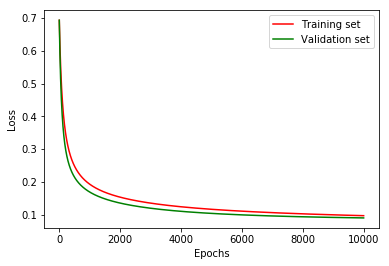

In [11]:
plt.plot(losstrack,"r")
plt.plot(losstrack1,"g")
plt.legend(["Training set","Validation set"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [12]:
#Checking accuracy,recall and precision for validation set.
z_val = sigmoid(np.dot(w.T,X_val) + b)
predicted_classes_val = (z_val >= 0.5).astype(int)
predicted_classes_val = predicted_classes_val.flatten()
accuracy_val = np.mean(predicted_classes_val == y_val.flatten())
accuracy_val = accuracy_val * 100
precision_val = precision_score(predicted_classes_val,y_val.flatten())
recall_val = recall_score(predicted_classes_val,y_val.flatten())
print ("Accuracy for validation set : ",accuracy_val)
print ("Precision for validation set : ",precision_val)
print ("Recall for validation set : ",recall_val)

Accuracy for validation set :  98.07692307692307
Precision for validation set :  1.0
Recall for validation set :  0.9444444444444444


In [13]:
#Checking accuracy,recall and precision for test set.
z_pred = sigmoid(np.dot(w.T,X_test) + b)
predicted_classes = (z_pred >= 0.5).astype(int)
predicted_classes = predicted_classes.flatten()
accuracy = np.mean(predicted_classes == y_test.flatten())
accuracy = accuracy * 100
precision = precision_score(predicted_classes,y_test.flatten())
recall = recall_score(predicted_classes,y_test.flatten())

print ("Accuracy for validation set : ",accuracy)
print ("Precision for validation set : ",precision)
print ("Recall for validation set : ",recall)

Accuracy for validation set :  96.49122807017544
Precision for validation set :  1.0
Recall for validation set :  0.92
